# Demo Python CBF-CLF-QP

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 250/250 [00:01<00:00, 164.42it/s]


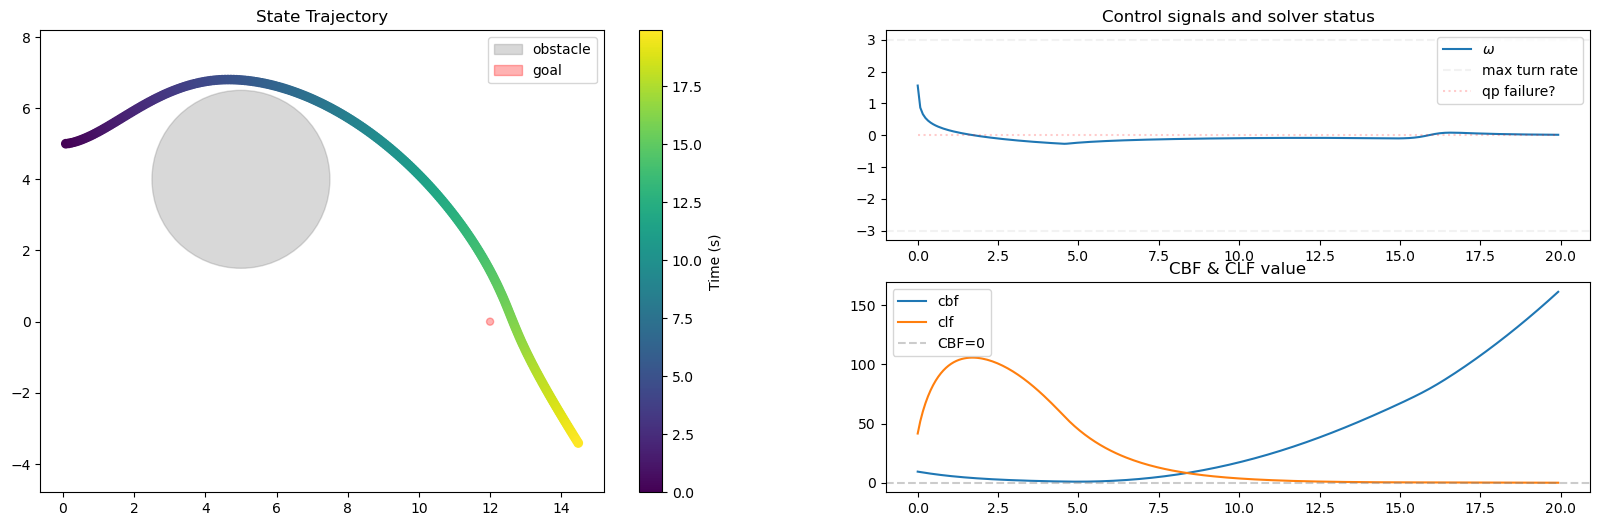

In [20]:
%load_ext autoreload
%autoreload 2
import numpy as np, jax.numpy as jnp, matplotlib.pyplot as plt
from lib_py import *
from tqdm import tqdm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


system = DubinsCar()
state, control = system.state_init, system.control_init

trajectory = {'ts':[], 'state':[], 'control':[], 'stat_infeasible':[]}
for i, t in (pbar:=tqdm(enumerate(ts:=jnp.arange(0, system.T, system.dt)),
                       total=len(ts))):
    pbar.update(1)
    control, stat_infeasible = system.solve_qp(state, control)
    state_dot = system.fn_dynamics_ode(state, control)
    state += system.dt * state_dot
    trajectory['ts'].append(t)
    trajectory['state'].append(state.copy())
    trajectory['control'].append(control)
    trajectory['stat_infeasible'].append(stat_infeasible)
trajectory = {k:np.array(v) for k,v in trajectory.items()}
system.plot_trajectory(trajectory)